# Data Set - Twitter Sentiment Analysis
##Members:
  ##C.E.M.S.M.Delwita - IT18150476
  ##M.C.P.Mendis - IT18115208
  ##Samarasinghe R.P. - IT18174168
 

#Dataset Link - https://drive.google.com/file/d/1GINToa6z5cka89AIqeM-w131OhdCIQIx/view?usp=sharing

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB


In [3]:
#import all necessary modules
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

#provide the path for the csv file containing the datatset
import os
os.chdir("C:\\Users\\chame\\OneDrive\\Desktop\\IRWA Assignment3")

#Read "Tweets.csv"(dataset) file
#using encoding = 'latin-1' to get vertical words arrangement along with horizontal once
df = pd.read_csv(r"Tweetss.csv")


In [4]:
#Display the Dataset

df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,positive,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
5,5.700000e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
6,5.700000e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/2015 11:13,San Francisco CA,Pacific Time (US & Canada)
7,5.700000e+17,positive,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2/24/2015 11:12,Los Angeles,Pacific Time (US & Canada)
8,5.700000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2/24/2015 11:11,San Diego,Pacific Time (US & Canada)
9,5.700000e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2/24/2015 10:53,Los Angeles,Eastern Time (US & Canada)


In [5]:
#Number of Rows and Columns in the Dataset

df.shape

(14640, 15)

In [6]:
#Information about the Dataset(NULL values,Column type,Range index)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
#repalcing the categorical values of 'airline_sentiment' to numeric values

df['airline_sentiment'].replace(('positive', 'negative'), (1 , 0), inplace=True)
df['airline_sentiment'].value_counts()

0    9178
1    5462
Name: airline_sentiment, dtype: int64

In [8]:
#Select the "airline_sentiment" and "text" columns from the dataframe

df = df[['airline_sentiment','text']]
df.head(10)

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...
5,0,@VirginAmerica seriously would pay $30 a fligh...
6,1,"@VirginAmerica yes, nearly every time I fly VX..."
7,1,@VirginAmerica Really missed a prime opportuni...
8,1,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,1,"@VirginAmerica it was amazing, and arrived an ..."


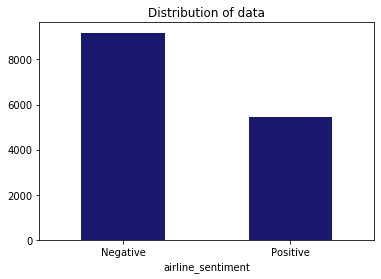

In [9]:
# Plotting the distribution for dataset.
ax = df.groupby('airline_sentiment').count().plot(kind='bar', title='Distribution of data',legend=False, color='midnightblue')
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, airline_sentiment = list(df['text']), list(df['airline_sentiment'])


In [10]:
textdata = df['text']
textdata

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

# Data pre-processing

4.	Clean the datasets such as removing any special characters, html tags, etc

In [11]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}



In [12]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        #Remove numeric values from "text" column in dataset
        tweet = tweet.replace('\d+', '')
        
        tweetwords = ''
        for word in tweet.split():
            
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText        

In [13]:
print(preprocess(textdata))

['USER what USER said ', 'USER plus you ve added commercials to the experience tacky ', 'USER i didn t today must mean i need to take another trip ', 'USER it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse ', 'USER and it s a really big bad thing about it ', 'USER seriously would pay 30 a flight for seats that didn t have this playing it s really the only bad thing about flying va ', 'USER yes nearly every time i fly vx this ear worm won t go away EMOJIsmile ', 'USER really missed a prime opportunity for men without hats parody there URL ', 'USER well i didn t but now i do d ', 'USER it was amazing and arrived an hour early you re too good to me ', 'USER did you know that suicide is the second leading cause of death among teens 10 24 ', 'USER i lt 3 pretty graphics so much better than minimal iconography d ', 'USER this is such a great deal already thinking about my 2nd trip to USER amp i haven t even gone on my 1st trip yet p ',

In [14]:
Word_array = preprocess(textdata)
Word_array

['USER what USER said ',
 'USER plus you ve added commercials to the experience tacky ',
 'USER i didn t today must mean i need to take another trip ',
 'USER it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse ',
 'USER and it s a really big bad thing about it ',
 'USER seriously would pay 30 a flight for seats that didn t have this playing it s really the only bad thing about flying va ',
 'USER yes nearly every time i fly vx this ear worm won t go away EMOJIsmile ',
 'USER really missed a prime opportunity for men without hats parody there URL ',
 'USER well i didn t but now i do d ',
 'USER it was amazing and arrived an hour early you re too good to me ',
 'USER did you know that suicide is the second leading cause of death among teens 10 24 ',
 'USER i lt 3 pretty graphics so much better than minimal iconography d ',
 'USER this is such a great deal already thinking about my 2nd trip to USER amp i haven t even gone on my 1st t

In [15]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 0 seconds


# Analysing the tweet data

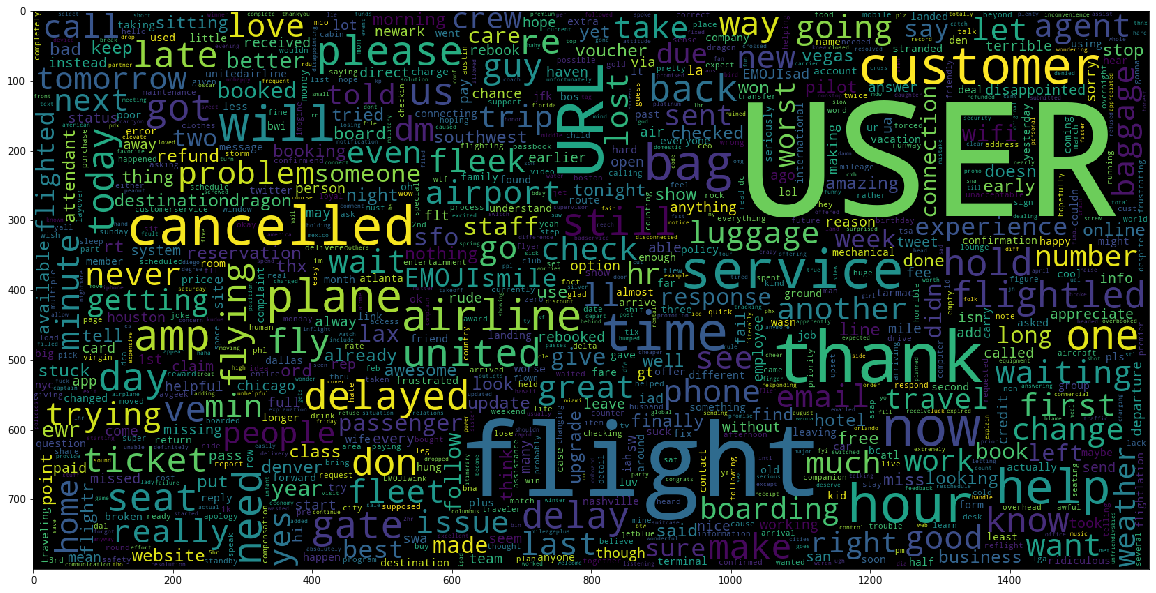

In [16]:
##Word-Cloud for Negative tweets.

data_neg = processedtext[:7320]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

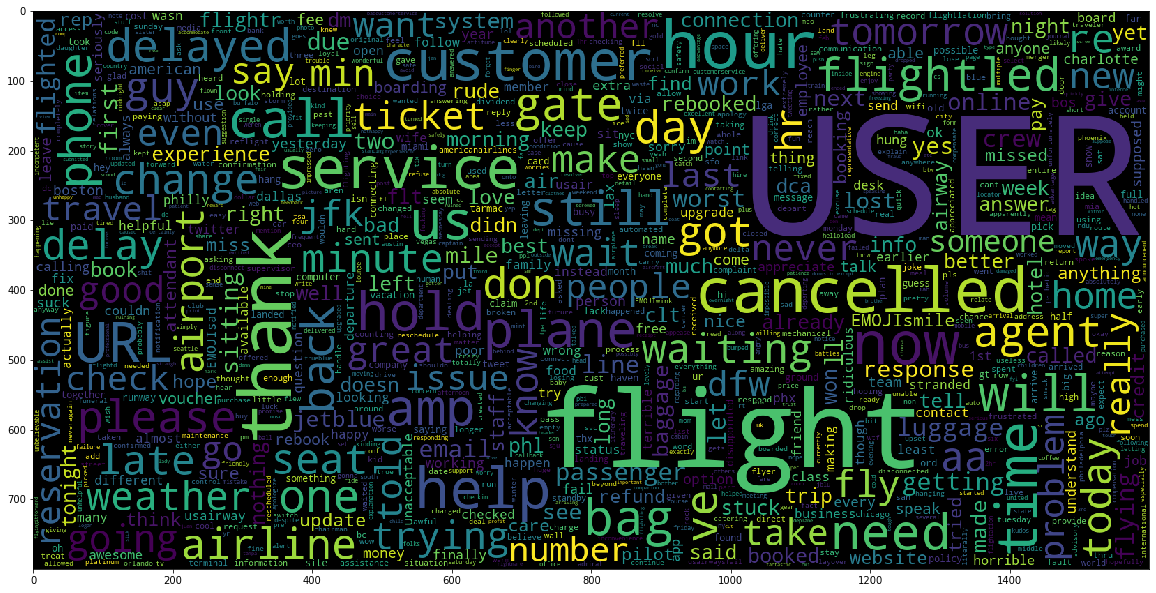

In [17]:
##Word-Cloud for Positive tweets.

data_pos = processedtext[7320:14640]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [18]:
###Import necessary Libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chame\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chame\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chame\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Tokenize the corpus

5.	Tokenize the corpus

In [19]:
#using nltk word_tokenize, tokenizing the Text
Tokenize_Array = [] 

for word in range(0, len(Word_array)):
    
    Tokenize = nltk.word_tokenize(Word_array[word])

    Tokenize_Array.append(Tokenize)
    
Tokenize

['USER',
 'we',
 'have',
 '8',
 'ppl',
 'so',
 'we',
 'need',
 '2',
 'know',
 'how',
 'many',
 'seats',
 'are',
 'on',
 'the',
 'next',
 'flight',
 'plz',
 'put',
 'us',
 'on',
 'standby',
 'for',
 '4',
 'people',
 'on',
 'the',
 'next',
 'flight']

In [20]:
#using nltk word_tokenize, removing stop words from tokenized text
sw =stopwords.words('english')

def RemovingStopWords(df):
    removedWords = []
    
    for rew_text in df:
        removedWords.append(
            [word for word in rew_text
                      if word not in sw])
    return removedWords

NumberOfCorrectWords = RemovingStopWords(Tokenize_Array)

sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Normalization, Stemming, Lemmatization

6.	Apply the Normalization, stemming, Lemmatization for the tokens in order to reduce the term vocabulary (feature selection)

In [21]:
#stemming text uisng poter's stemmer
PortStem = PorterStemmer()

def Stemmer_Words(rew_texts):
       return [([PortStem.stem(word) for word in rew_text]) for rew_text in rew_texts]
 
    
Stemmer = Stemmer_Words(NumberOfCorrectWords)

Stemmer

[['user', 'user', 'said'],
 ['user', 'plu', 'ad', 'commerci', 'experi', 'tacki'],
 ['user', 'today', 'must', 'mean', 'need', 'take', 'anoth', 'trip'],
 ['user',
  'realli',
  'aggress',
  'blast',
  'obnoxi',
  'entertain',
  'guest',
  'face',
  'amp',
  'littl',
  'recours'],
 ['user', 'realli', 'big', 'bad', 'thing'],
 ['user',
  'serious',
  'would',
  'pay',
  '30',
  'flight',
  'seat',
  'play',
  'realli',
  'bad',
  'thing',
  'fli',
  'va'],
 ['user',
  'ye',
  'nearli',
  'everi',
  'time',
  'fli',
  'vx',
  'ear',
  'worm',
  'go',
  'away',
  'emojismil'],
 ['user',
  'realli',
  'miss',
  'prime',
  'opportun',
  'men',
  'without',
  'hat',
  'parodi',
  'url'],
 ['user', 'well'],
 ['user', 'amaz', 'arriv', 'hour', 'earli', 'good'],
 ['user',
  'know',
  'suicid',
  'second',
  'lead',
  'caus',
  'death',
  'among',
  'teen',
  '10',
  '24'],
 ['user',
  'lt',
  '3',
  'pretti',
  'graphic',
  'much',
  'better',
  'minim',
  'iconographi'],
 ['user',
  'great',
  'dea

In [22]:
##using nltk word_tokenize,Lemmatizing 
def Lemmatizing(rew_texts):
    Lem = WordNetLemmatizer()
    return [([Lem.lemmatize(word) for word in rew_text]) for rew_text in rew_texts]

LemmatizedText = Lemmatizing(Stemmer)

LemmatizedText

[['user', 'user', 'said'],
 ['user', 'plu', 'ad', 'commerci', 'experi', 'tacki'],
 ['user', 'today', 'must', 'mean', 'need', 'take', 'anoth', 'trip'],
 ['user',
  'realli',
  'aggress',
  'blast',
  'obnoxi',
  'entertain',
  'guest',
  'face',
  'amp',
  'littl',
  'recours'],
 ['user', 'realli', 'big', 'bad', 'thing'],
 ['user',
  'serious',
  'would',
  'pay',
  '30',
  'flight',
  'seat',
  'play',
  'realli',
  'bad',
  'thing',
  'fli',
  'va'],
 ['user',
  'ye',
  'nearli',
  'everi',
  'time',
  'fli',
  'vx',
  'ear',
  'worm',
  'go',
  'away',
  'emojismil'],
 ['user',
  'realli',
  'miss',
  'prime',
  'opportun',
  'men',
  'without',
  'hat',
  'parodi',
  'url'],
 ['user', 'well'],
 ['user', 'amaz', 'arriv', 'hour', 'earli', 'good'],
 ['user',
  'know',
  'suicid',
  'second',
  'lead',
  'caus',
  'death',
  'among',
  'teen',
  '10',
  '24'],
 ['user',
  'lt',
  '3',
  'pretti',
  'graphic',
  'much',
  'better',
  'minim',
  'iconographi'],
 ['user',
  'great',
  'dea

# 	Vectorize the tokens

7.	Vectorize the tokens

In [23]:
#Calculate tf_idf values, using collection of all the review texts
def join(TokenizedText):
      return [' '.join([word for word in rew_text]) for rew_text in TokenizedText]
    
Collection = join(LemmatizedText)

Collection

['user user said',
 'user plu ad commerci experi tacki',
 'user today must mean need take anoth trip',
 'user realli aggress blast obnoxi entertain guest face amp littl recours',
 'user realli big bad thing',
 'user serious would pay 30 flight seat play realli bad thing fli va',
 'user ye nearli everi time fli vx ear worm go away emojismil',
 'user realli miss prime opportun men without hat parodi url',
 'user well',
 'user amaz arriv hour earli good',
 'user know suicid second lead caus death among teen 10 24',
 'user lt 3 pretti graphic much better minim iconographi',
 'user great deal alreadi think 2nd trip user amp even gone 1st trip yet p',
 'user user fli fabul seduct sky u take stress away travel url',
 'user thank',
 'user sfo pdx schedul still mia',
 'user excit first cross countri flight lax mco heard noth great thing virgin america 29daystogo',
 'user flew nyc sfo last week fulli sit seat due two larg gentleman either side help',
 'fli user',
 'user know would amazingli awes

# Convert the tokens into tf-idf weights

8.	Convert the tokens into tf-idf weights then normalize the term vectors.

In [24]:
#define vectorization model to extract the feature set
vector = TfidfVectorizer (max_features=4000, min_df=2, max_df=0.9)

#pass the corpus into the defined vectorizer
Vectorization = vector.fit_transform(Collection).toarray()

Vectorization

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Split the dataset

9.	Separate the datasets as Train and Test dataset

In [25]:
from sklearn.model_selection import train_test_split
#Split the dataset as trainingset and testingset
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Vectorization, airline_sentiment, test_size=0.2, random_state=0)



# Naïve Bayes Model
# ----------------------------

10.	Build Naïve Bayes model using the Train data

11.	Test the model using Test Data

12.	Calculate the confusion matrix and identify the model performance.

In [26]:
Naive_Bayes_Classifier = MultinomialNB()
Naive_Bayes_Classifier.fit(X_Train, Y_Train)

Naive_Bayes_Predictions= Naive_Bayes_Classifier.predict(X_Test)

con_mat=confusion_matrix(Y_Test,Naive_Bayes_Predictions)
print('Confusion Matrix :-',+con_mat)

accu=accuracy_score(Y_Test, Naive_Bayes_Predictions)
print('Accuracy :- ',+accu)

print(classification_report(Y_Test,Naive_Bayes_Predictions))



Confusion Matrix :- [[1768  102]
 [ 453  605]]
Accuracy :-  0.8104508196721312
              precision    recall  f1-score   support

           0       0.80      0.95      0.86      1870
           1       0.86      0.57      0.69      1058

    accuracy                           0.81      2928
   macro avg       0.83      0.76      0.77      2928
weighted avg       0.82      0.81      0.80      2928



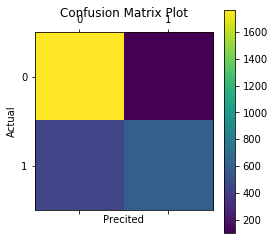

In [27]:
plt.matshow(con_mat)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

# K-NN Model
# --------------------------

13.	Build K-NN model using the Train data and a random K value

14.	Test the model using Test Data

15.	Calculate the confusion matrix and identify the model performance 

16.	Select the best value for K.

In [28]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Train)

X_Train = scaler.transform(X_Train)
X_Test = scaler.transform(X_Test)

from sklearn.neighbors import KNeighborsClassifier

Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(X_Train, Y_Train)

Y_Pred = Classifier.predict(X_Test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

con_mat=confusion_matrix(Y_Test,Y_Pred)
print('Confusion Matrix :-',+con_mat)

accu=accuracy_score(Y_Test, Y_Pred)
print('Accuracy :- ',+accu)

print(classification_report(Y_Test, Y_Pred))


Confusion Matrix :- [[872 998]
 [304 754]]
Accuracy :-  0.555327868852459
              precision    recall  f1-score   support

           0       0.74      0.47      0.57      1870
           1       0.43      0.71      0.54      1058

    accuracy                           0.56      2928
   macro avg       0.59      0.59      0.55      2928
weighted avg       0.63      0.56      0.56      2928



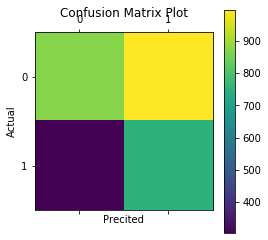

In [30]:
plt.matshow(con_mat)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [31]:
error = []

#Calculating error for K values between 1 and 5
#Best k comming for minimum error

for i in range(1, 5):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_Train, Y_Train)
    Pred_i = KNN.predict(X_Test)
    error.append(np.mean(Pred_i != Y_Test))

In [32]:
print(error)

[0.36543715846994534, 0.3401639344262295, 0.4067622950819672, 0.3709016393442623]


Text(0, 0.5, 'Mean error')

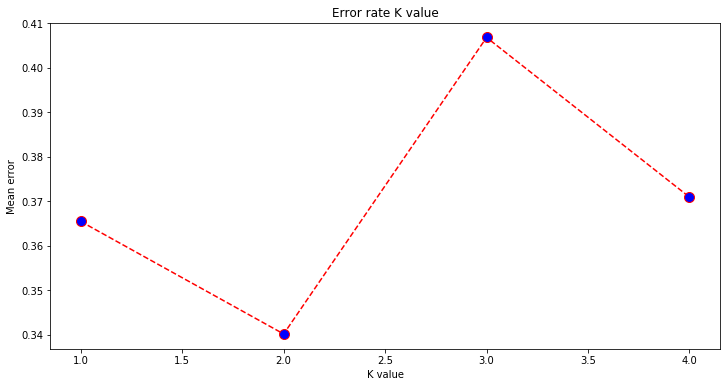

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Error rate K value")
plt.xlabel("K value")
plt.ylabel("Mean error")

In [34]:
##Select K = 2 for minimum error rate
Classifier = KNeighborsClassifier(n_neighbors=2)
Classifier.fit(X_Train, Y_Train)

Y_pred = Classifier.predict(X_Test)

from sklearn.metrics import classification_report, confusion_matrix

con_mat=confusion_matrix(Y_Test,Y_Pred)
print('Confusion Matrix :-',+con_mat)

accu=accuracy_score(Y_Test, Y_Pred)
print('Accuracy :- ',+accu)

print(classification_report(Y_Test, Y_Pred))


Confusion Matrix :- [[872 998]
 [304 754]]
Accuracy :-  0.555327868852459
              precision    recall  f1-score   support

           0       0.74      0.47      0.57      1870
           1       0.43      0.71      0.54      1058

    accuracy                           0.56      2928
   macro avg       0.59      0.59      0.55      2928
weighted avg       0.63      0.56      0.56      2928



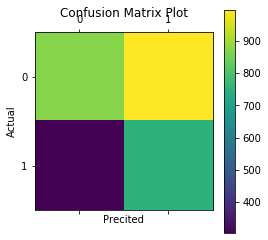

In [35]:
plt.matshow(con_mat)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

# SVM Model
# -----------------

17.Build SVM model using Train Data

18.Test the model using the test data

19.Calculate the confusion matrix and identify the model performance.

In [36]:
Linear_Classifier = svm.SVC(kernel='linear')
Linear_Classifier.fit(X_Train, Y_Train)

SVM_Predictions = Linear_Classifier.predict(X_Test)

con_mat=confusion_matrix(Y_Test,SVM_Predictions)
print('Confusion Matrix :-',+con_mat)

accur=accuracy_score(Y_Test, SVM_Predictions)
print('Accuracy :- ',+accur)

print(classification_report(Y_Test , SVM_Predictions))


Confusion Matrix :- [[1453  417]
 [ 315  743]]
Accuracy :-  0.75
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1870
           1       0.64      0.70      0.67      1058

    accuracy                           0.75      2928
   macro avg       0.73      0.74      0.73      2928
weighted avg       0.76      0.75      0.75      2928



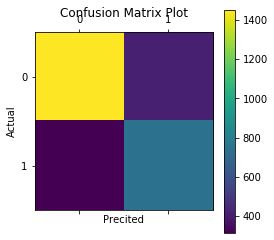

In [37]:
plt.matshow(con_mat)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

20.	Compare the model performance and select a best model and briefly discuss why this is the best model

In [38]:
print('Accuracy of all Three Models' + '\n')
print('Naive Bayes Model :- ' + ' 0.81')
print('KNN Model :- ' + '0.56')
print('SVM model :- ' + '0.75' + '\n')
print('From Above Three Models The Best Model With Best Accuracy Is Naive Bayes Model')

Accuracy of all Three Models

Naive Bayes Model :-  0.81
KNN Model :- 0.56
SVM model :- 0.75

From Above Three Models The Best Model With Best Accuracy Is Naive Bayes Model


SVM model is not suitable for large dataset and it takes higher processing time to get the output and KNN model is also same as SVM

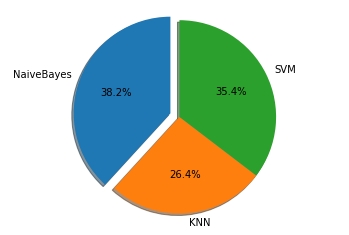

From Above Three Models The Best Model With Best Accuracy Is Naive Bayes Model


In [39]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NaiveBayes', 'KNN','SVM'
sizes = [0.81,0.56,0.75]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print('From Above Three Models The Best Model With Best Accuracy Is Naive Bayes Model')

21.How can you improve the performance of your models?

 * if we can add more data and add more features it will lead us to get high accuracy and a flexible model

* In Naive bayes we can improve the accuracy by adjusting the classifier's tunable paramaters and also it depend on the qulity of our data 

* In KNN model rescaling features will improve the accuracy